In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from data_generators import *

## 1 Higgs boson discovery
In a particle physics experiment, we measure 3 quantities for events whose final state particles are two photons ($\gamma \gamma$). According to the Standard Model (SM) These events will include some signal events from a Higgs decay $H \rightarrow \gamma \gamma$, but also many background events from other processes whose final state is $\gamma \gamma$.

The three observables we measure are:
* $E_T$: the transverse energy of the leading jet.
* $m_{\gamma \gamma}$: the invariant mass of the two final state photons.
* $\Delta \phi _{jj}$: the angular separation between the two leading jets. 


We simulate data according to two hypotheses:
1. $H_0$: the background-only hypothesis, i.e. the SM without a Higgs boson present.
2. $H_1$: the signal hypothesis, i.e. the full SM.

In [2]:
sm_background = StandardModelBackgroundGenerator()
sm_signal = StandardModelSignalGenerator()

n_data_sim = int(1e6)

h_0_simulated_data = generate_data(n=n_data_sim, background_generator=sm_background, signal_generator=sm_signal,
                                  signal_prob=0)
h_1_simulated_data = generate_data(n=n_data_sim, background_generator=sm_background, signal_generator=sm_signal)
h_1_simulated_data.head()

100000/1000000 samples completed
200000/1000000 samples completed
300000/1000000 samples completed
400000/1000000 samples completed
500000/1000000 samples completed
600000/1000000 samples completed
700000/1000000 samples completed
800000/1000000 samples completed
900000/1000000 samples completed
1000000/1000000 samples completed
100000/1000000 samples completed
200000/1000000 samples completed
300000/1000000 samples completed
400000/1000000 samples completed
500000/1000000 samples completed
600000/1000000 samples completed
700000/1000000 samples completed
800000/1000000 samples completed
900000/1000000 samples completed
1000000/1000000 samples completed


,E_t,delta_phi,m_jj,signal
0,190.029709,2.536840,114.722801,0.0
1,88.709953,-2.994462,143.904297,0.0
2,163.158768,2.389598,124.822952,0.0
3,141.748352,0.608726,98.731621,0.0
4,98.923454,-0.131365,142.052475,0.0


In [30]:
n_data_ex = int(1e5)
experimental_data = generate_data(n=n_data_ex, background_generator=sm_background, signal_generator=sm_signal,
                                 signal_prob=0.0065)

10000/100000 samples completed
20000/100000 samples completed
30000/100000 samples completed
40000/100000 samples completed
50000/100000 samples completed
60000/100000 samples completed
70000/100000 samples completed
80000/100000 samples completed
90000/100000 samples completed
100000/100000 samples completed


We know from theory that the number of Higgs boson events is expected to experience a bump in events at $m_{\gamma\gamma} \approx m_H \approx 125$ GeV. To analyse the data, we group the data into bins in $m_{\gamma \gamma}$ of size 1 GeV, and plot the predictions of $H_0$ and $H_1$ alongside the experimental values.

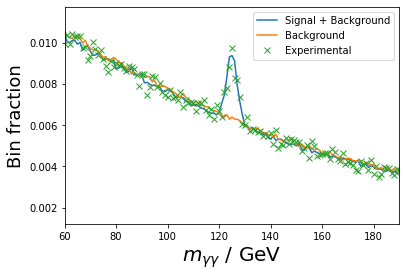

In [41]:
def get_bin_fractions(series):
    series_hist = series.round().value_counts().sort_index()
    return series_hist/series_hist.sum()

h_0_sim_hist = get_bin_fractions(h_0_simulated_data['m_jj'])
h_1_sim_hist = get_bin_fractions(h_1_simulated_data['m_jj'])
ex_hist = get_bin_fractions(experimental_data['m_jj']) 
h_1_sim_hist.plot(label='Signal + Background', xlim=[60, 190])
h_0_sim_hist.plot(label='Background')
plt.plot(ex_hist.index, ex_hist.values, 'x', label='Experimental')
plt.xlabel('$m_{\gamma \gamma}$ / GeV', fontsize=20)
plt.ylabel('Bin fraction', fontsize=18)
plt.legend()

This certainly looks like we have a Higgs boson, but with what statistical significance could we make that statement? In a real experiment we would perform a rigorous statistical test, but for our purposes it is sufficient to use the approximation

$$ z \approx \frac{S}{\sqrt{B}} \, ,$$

where $S$ is the number of signal events and $B$ is the number of background events (in reality we would not have access to these numbers for experimental data, but we have actually simulated our 'experimental' data).

The significance $z$ is related to the $p$-value by

$$ p = \Phi (z) \, ,$$

where $\Phi$ is the cumulative distribution function of the standard Gaussian.

In [43]:
def estimate_significance(data):
    return (data['signal'].sum())/np.sqrt(data['signal'].count())


print('z = {:.2f}'.format(estimate_significance(experimental_data)))

z = 4.38


So we have a result that is slightly below the significance required to claim discovery in particle physics ($z=5$). In order to better isolate our signal, we need to perform cuts on the data, which means placing restrictions on the observables. To inform us about which cuts to make, we can plot the distribution of $E_T$ for the signal events in our simulated data.

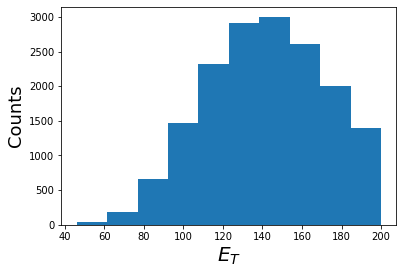

In [35]:
h_1_signal_data = h_1_simulated_data[h_1_simulated_data['signal'] == 1]

h_1_signal_data['E_t'].plot.hist()
plt.xlabel('$E_T$', fontsize=20)
plt.ylabel('Counts', fontsize=18)
plt.show()

In [36]:
cut_data = experimental_data[experimental_data['E_t'] > 50]
estimate_significance(cut_data)

5.036758292414559